In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=73a76089f7e386bea6a5b6409b5e7145


In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | hofn
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | quesnel
Processing Record 8 of Set 1 | tursunzoda
Processing Record 9 of Set 1 | berlevag
Processing Record 10 of Set 1 | gazojak
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | bangui
Processing Record 17 of Set 1 | llano largo
Processing Record 18 of Set 1 | meyungs
City not found. Skipping...
Processing Record 19 of Set 1 | humaita
Processing Record 20 of Set 1 | mangan
Processing Record 21 of Set 1 | atar
Processing Record 22 of Set 1

Processing Record 39 of Set 4 | saleaula
City not found. Skipping...
Processing Record 40 of Set 4 | sibolga
Processing Record 41 of Set 4 | flinders
Processing Record 42 of Set 4 | amparai
City not found. Skipping...
Processing Record 43 of Set 4 | mbanza-ngungu
Processing Record 44 of Set 4 | krechevitsy
Processing Record 45 of Set 4 | vetlanda
Processing Record 46 of Set 4 | klyuchi
Processing Record 47 of Set 4 | panguna
Processing Record 48 of Set 4 | shingu
Processing Record 49 of Set 4 | tasiilaq
Processing Record 50 of Set 4 | natitingou
Processing Record 1 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 5 | castro
Processing Record 3 of Set 5 | sao joao da barra
Processing Record 4 of Set 5 | lufilufi
Processing Record 5 of Set 5 | fukue
Processing Record 6 of Set 5 | kitimat
Processing Record 7 of Set 5 | hami
Processing Record 8 of Set 5 | kloulklubed
Processing Record 9 of Set 5 | norman wells
Processing Record 10 of Set 5 | campo de criptana
Proc

Processing Record 29 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 30 of Set 8 | miri
Processing Record 31 of Set 8 | itarema
Processing Record 32 of Set 8 | souillac
Processing Record 33 of Set 8 | korla
Processing Record 34 of Set 8 | salalah
Processing Record 35 of Set 8 | spencer
Processing Record 36 of Set 8 | komatipoort
Processing Record 37 of Set 8 | teeli
Processing Record 38 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 39 of Set 8 | raymond
Processing Record 40 of Set 8 | baza
Processing Record 41 of Set 8 | baloda bazar
Processing Record 42 of Set 8 | wahpeton
Processing Record 43 of Set 8 | awjilah
Processing Record 44 of Set 8 | nishihara
Processing Record 45 of Set 8 | redlands
Processing Record 46 of Set 8 | yerbogachen
Processing Record 47 of Set 8 | bloomfield
Processing Record 48 of Set 8 | yendi
Processing Record 49 of Set 8 | grand baie
Processing Record 50 of Set 8 | zhemchuzhnyy
City not found. Skipping...
Processing Re

Processing Record 17 of Set 12 | carndonagh
Processing Record 18 of Set 12 | srednekolymsk
Processing Record 19 of Set 12 | imeni poliny osipenko
Processing Record 20 of Set 12 | adiake
Processing Record 21 of Set 12 | zelenoborskiy
Processing Record 22 of Set 12 | topeka
Processing Record 23 of Set 12 | tunduru
City not found. Skipping...
Processing Record 24 of Set 12 | merin
Processing Record 25 of Set 12 | babati
Processing Record 26 of Set 12 | frontignan
Processing Record 27 of Set 12 | gubskaya
Processing Record 28 of Set 12 | ust-kuyga
Processing Record 29 of Set 12 | lishui
Processing Record 30 of Set 12 | leku
Processing Record 31 of Set 12 | porkhov
Processing Record 32 of Set 12 | ust-barguzin
Processing Record 33 of Set 12 | honiara
Processing Record 34 of Set 12 | koslan
Processing Record 35 of Set 12 | aykhal
Processing Record 36 of Set 12 | houston
Processing Record 37 of Set 12 | gwadar
Processing Record 38 of Set 12 | carberry
Processing Record 39 of Set 12 | zambezi


In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,-5.82,85,3,11.63,RU,2022-02-05 17:46:42
1,Ushuaia,-54.8000,-68.3000,64.02,39,40,12.66,AR,2022-02-05 17:45:46
2,Thompson,55.7435,-97.8558,-25.44,68,75,0.00,CA,2022-02-05 17:42:37
3,Saldanha,-33.0117,17.9442,87.85,71,8,8.03,ZA,2022-02-05 17:46:43
4,Hofn,64.2539,-15.2082,28.98,58,100,10.07,IS,2022-02-05 17:46:43
5,Busselton,-33.6500,115.3333,67.05,72,0,4.21,AU,2022-02-05 17:46:44
6,Quesnel,52.9999,-122.5029,25.30,100,20,2.30,CA,2022-02-05 17:45:21
7,Tursunzoda,38.5144,68.2333,50.88,65,100,2.21,TJ,2022-02-05 17:46:44
8,Berlevag,70.8578,29.0864,23.54,84,99,25.01,NO,2022-02-05 17:46:45
9,Gazojak,41.1875,61.4036,45.93,63,86,16.28,TM,2022-02-05 17:46:45


In [21]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-02-05 17:46:42,64.3833,-173.3000,-5.82,85,3,11.63
1,Ushuaia,AR,2022-02-05 17:45:46,-54.8000,-68.3000,64.02,39,40,12.66
2,Thompson,CA,2022-02-05 17:42:37,55.7435,-97.8558,-25.44,68,75,0.00
3,Saldanha,ZA,2022-02-05 17:46:43,-33.0117,17.9442,87.85,71,8,8.03
4,Hofn,IS,2022-02-05 17:46:43,64.2539,-15.2082,28.98,58,100,10.07
5,Busselton,AU,2022-02-05 17:46:44,-33.6500,115.3333,67.05,72,0,4.21
6,Quesnel,CA,2022-02-05 17:45:21,52.9999,-122.5029,25.30,100,20,2.30
7,Tursunzoda,TJ,2022-02-05 17:46:44,38.5144,68.2333,50.88,65,100,2.21
8,Berlevag,NO,2022-02-05 17:46:45,70.8578,29.0864,23.54,84,99,25.01
9,Gazojak,TM,2022-02-05 17:46:45,41.1875,61.4036,45.93,63,86,16.28


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

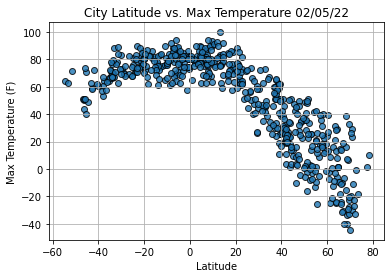

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

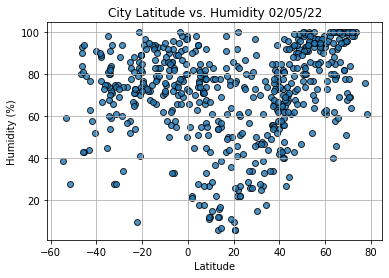

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()